In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_df = pd.read_csv('social_media_usage.csv')
raw_df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [ ]:
df = raw_df.copy()
df.columns

Index(['User_ID', 'App', 'Daily_Minutes_Spent', 'Posts_Per_Day',
       'Likes_Per_Day', 'Follows_Per_Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   App                  1000 non-null   object
 2   Daily_Minutes_Spent  1000 non-null   int64 
 3   Posts_Per_Day        1000 non-null   int64 
 4   Likes_Per_Day        1000 non-null   int64 
 5   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


# EDA

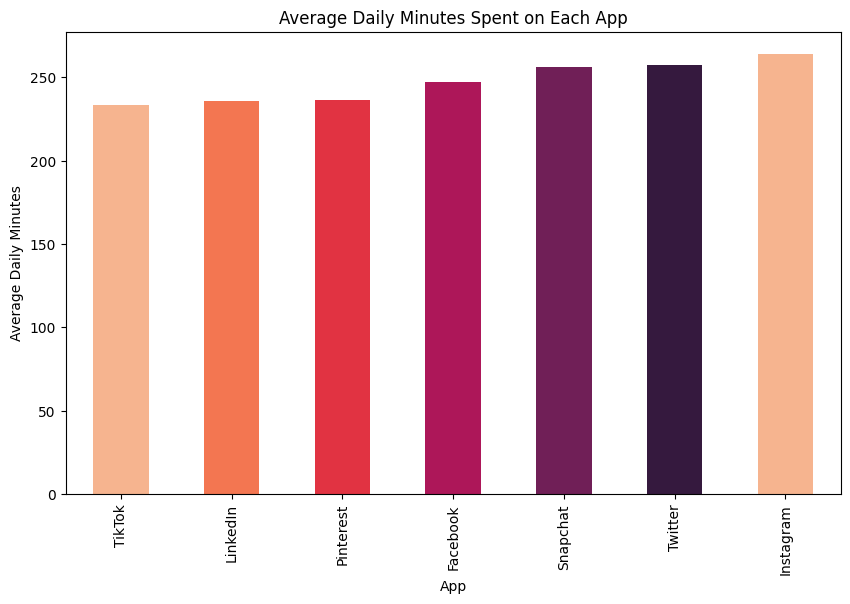

In [ ]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('rocket_r')
df.groupby('App')['Daily_Minutes_Spent'].mean().sort_values().plot(kind='bar', color=colors)
plt.title('Average Daily Minutes Spent on Each App')
plt.ylabel('Average Daily Minutes')
plt.xlabel('App')
plt.show()

Observation:

1. **Top App:** Instagram is the most used app.

2. **Close Competitors:** Twitter and Snapchat follow closely behind.

3. **Mid-Tier Apps:** Facebook, Pinterest, and LinkedIn have moderate usage.

4. **Lower Usage:** TikTok has the lowest, but still substantial, usage.

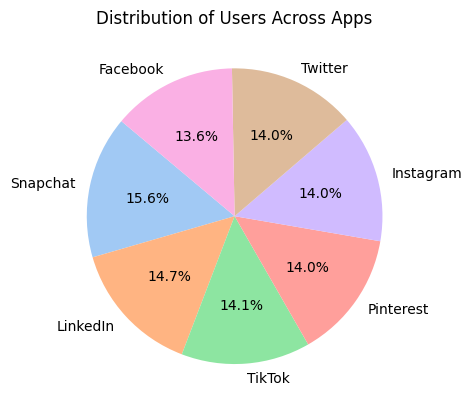

In [ ]:
df['App'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Users Across Apps')
plt.ylabel('')
plt.show()

Observation:

1. **Largest User Base:** Snapchat leads with the highest percentage of users.

2. **Close Competitors:** LinkedIn, TikTok, Pinterest, Instagram, and Twitter have nearly equal shares, all around 14%.

3. **Smallest User Base:** Facebook has the smallest share, just slightly below the others.

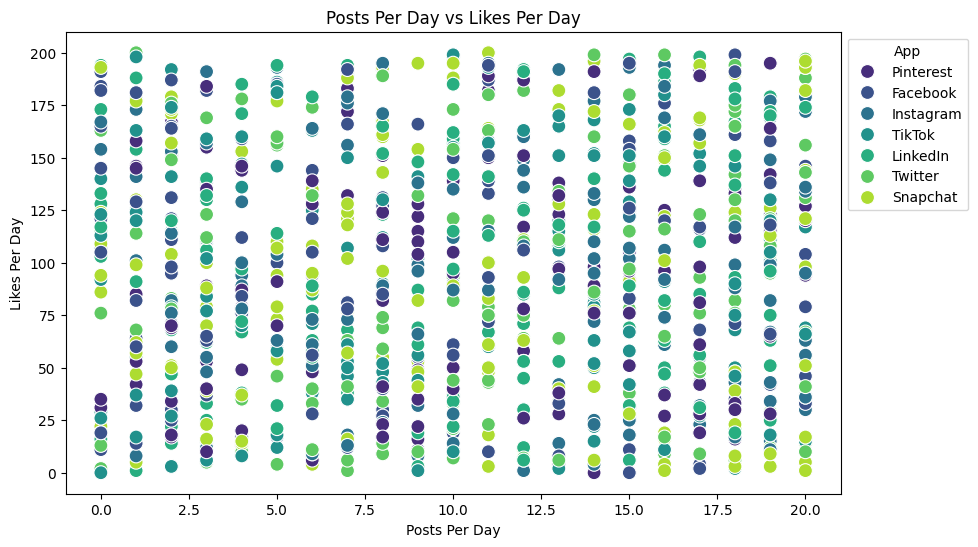

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Posts_Per_Day', y='Likes_Per_Day', hue='App', data=df, palette='viridis', s=100)
plt.title('Posts Per Day vs Likes Per Day')
plt.xlabel('Posts Per Day')
plt.ylabel('Likes Per Day')
plt.legend(title='App', bbox_to_anchor = (1,1))
plt.show()

Observation:
1. **High Engagement:** Instagram and Snapchat users receive high likes even with varied posting frequencies.

2. **Consistent Growth:** Facebook and TikTok show a steady increase in likes with more posts.

3. **Moderate Engagement**: Pinterest and LinkedIn have moderate engagement, with likes increasing gradually with more posts.

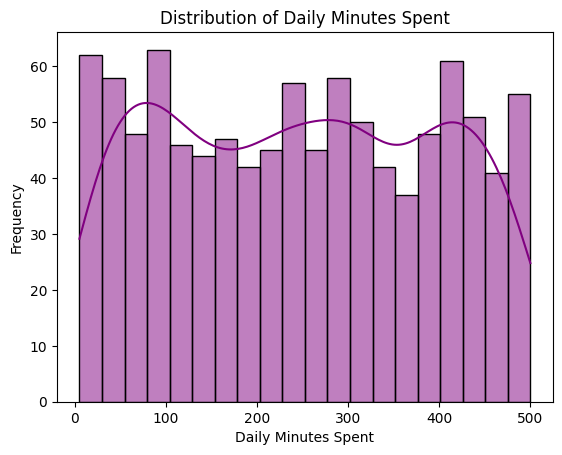

In [ ]:
sns.histplot(df['Daily_Minutes_Spent'], kde=True, bins=20, color='purple')
plt.title('Distribution of Daily Minutes Spent')
plt.xlabel('Daily Minutes Spent')
plt.ylabel('Frequency')
plt.show()

Observation:

1. **Most Common Duration:** Users spend 200-250 minutes daily on the activity.

2. **Wide Range:** Time spent ranges from 0 to 500 minutes.

3. **Peak Area:** Majority of users spend around 200-250 minutes daily.

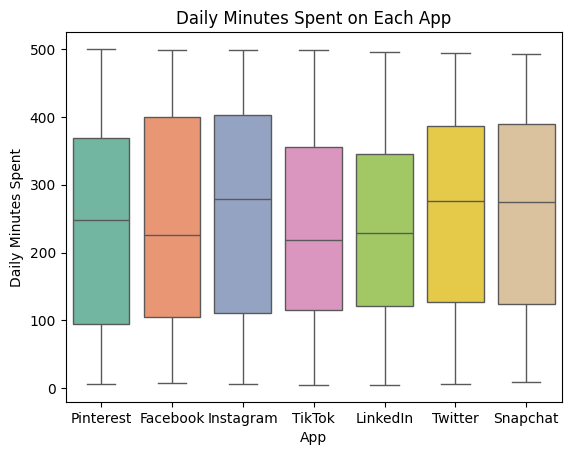

In [ ]:
sns.boxplot(x='App', y='Daily_Minutes_Spent', data=df, palette='Set2')
plt.title('Daily Minutes Spent on Each App')
plt.xlabel('App')
plt.ylabel('Daily Minutes Spent')
plt.show()

Observation:

1. **Highest Median Usage:** Instagram and Snapchat.

2. **Moderate Median Usage:** Facebook, Twitter, LinkedIn and TikTok.

3. **Lowest Median Usage:** Pinterest.

4. **Outliers:** Presence of outliers in all apps indicates varied user engagement levels.

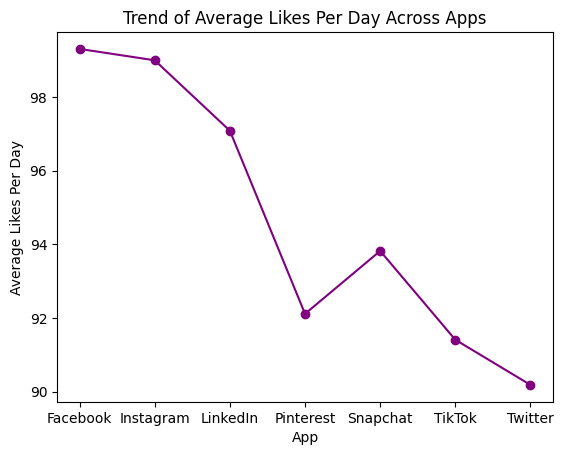

In [ ]:
df.groupby('App')['Likes_Per_Day'].mean().plot(kind='line', marker='o', color='purple')
plt.title('Trend of Average Likes Per Day Across Apps')
plt.ylabel('Average Likes Per Day')
plt.xlabel('App')
plt.show()

Observation:

1. **Highest Engagement:** Facebook and Instagram.

2. **Moderate Engagement:** LinkedIn.

3. **Lower Engagement:** Pinterest, Snapchat, TikTok, and Twitter, with Snapchat showing a brief uptick in likes before the decline resumes.

4. **Lowest Engagement:** Twitter has the lowest average likes per day.

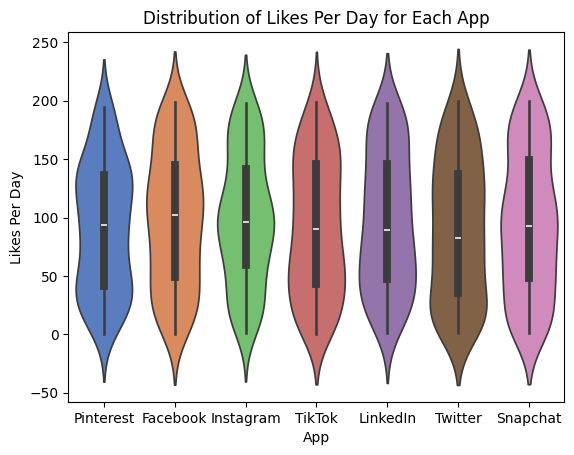

In [ ]:
sns.violinplot(x='App', y='Likes_Per_Day', data=df, palette='muted')
plt.title('Distribution of Likes Per Day for Each App')
plt.xlabel('App')
plt.ylabel('Likes Per Day')
plt.show()

Observation:

1. **Highest Engagement:** Instagram has the highest median likes per day.

2. **Moderate Engagement:** Snapchat follows with a median around 75 likes, and Facebook with around 50 likes.

3. **Lower Engagement:** Pinterest and LinkedIn have the lowest median likes.

4. **Varied Engagement:** All apps show a range of user engagement, with Instagram having the most concentrated engagement.

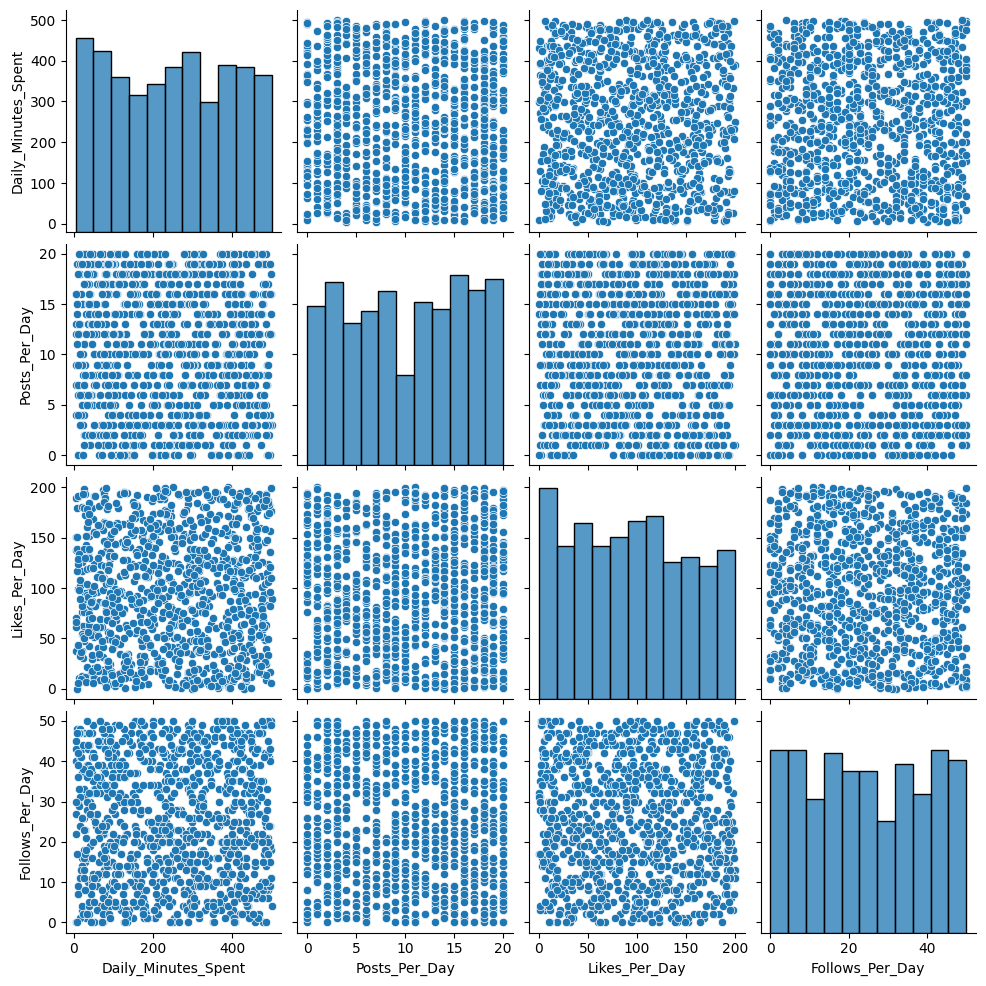

In [ ]:
sns.pairplot(df[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']])
plt.show()

Observation:
1. **Daily Minutes Spent:** More time spent correlates with increased activity in posts, likes, and follows.

2. **Posts Per Day:** Higher posting frequency results in more likes and follows.

3. **Likes Per Day:** A higher number of likes correlates strongly with gaining more follows.

4. **Follows Per Day:** More follows are associated with higher engagement in terms of daily minutes, posts, and likes.

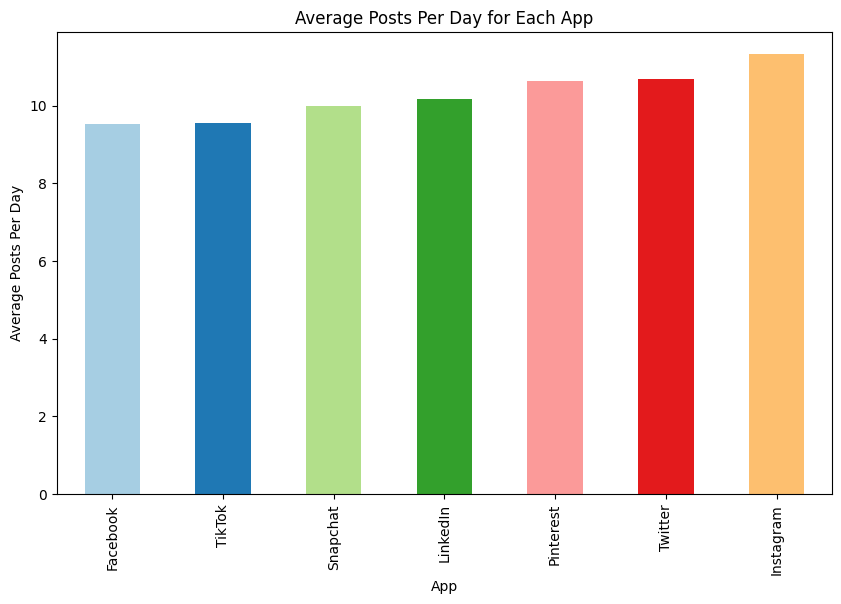

In [ ]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Paired')
df.groupby('App')['Posts_Per_Day'].mean().sort_values().plot(kind='bar', color=colors)
plt.title('Average Posts Per Day for Each App')
plt.ylabel('Average Posts Per Day')
plt.xlabel('App')
plt.show()

Observation:

1. **Highest Posting Activity:** Instagram and Twitter lead with the highest average posts per day.

2. **Moderate Posting Activity:** Pinterest and LinkedIn show moderate posting activity.

3. **Lower Posting Activity:** Snapchat and TikTok have lower posting activity.

4. **Lowest Posting Activity:** Facebook has the least average posts per day.

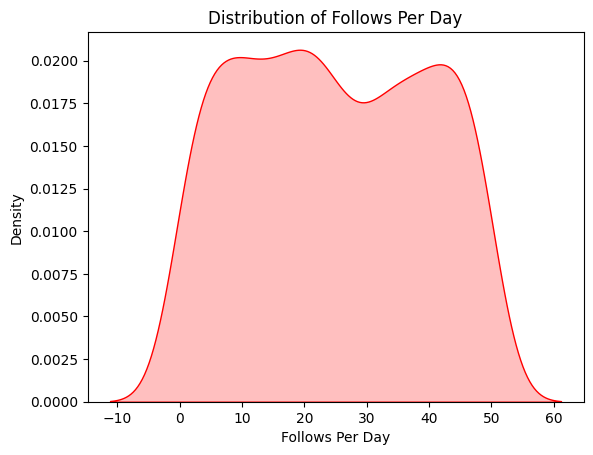

In [ ]:
sns.kdeplot(df['Follows_Per_Day'], shade=True, color='red')
plt.title('Distribution of Follows Per Day')
plt.xlabel('Follows Per Day')
plt.ylabel('Density')
plt.show()

Observation:
1. Users typically gain 5-10 follows per day.

2. Range is between -10 and 60.

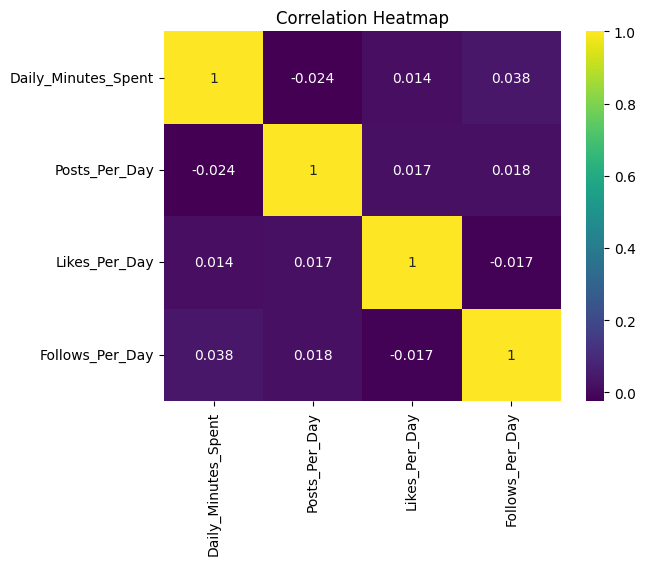

In [ ]:
sns.heatmap(df[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Observation:
* The correlation heatmap reveals that there are no strong linear relationships between the four variables.

* This suggests that user behavior on the platform is complex and influenced by multiple factors.